## 4.5 权重衰减
前一节我们描述了过拟合的问题，本节我们将介绍一些正则化模型的技术。
我们总是可以通过去收集更多的训练数据来缓解过拟合。
但这可能成本很高，耗时颇多，或者完全超出我们的控制，因而在短期内不可能做到。
假设我们已经拥有尽可能多的高质量数据，我们便可以将重点放在正则化技术上。

回想一下，在多项式回归的例子中。
我们可以通过调整拟合多项式的阶数来限制模型的容量。
实际上，限制特征的数量是缓解过拟合的一种常用技术。
然而，简单地丢弃特征对于这项工作来说可能过于生硬。

我们继续思考多项式回归的例子，考虑高维输入可能发生的情况。 、
多项式对多变量数据的自然扩展称为单项式（monomials）， 也可以说是变量幂的乘积。 、单项式的阶数是幂的和
例如， x1 ** 2 * x2 和 x3 * x5 ** 2 都是3次单项式。

注意，随着阶数 d 的增长，带有阶数 d 的项数迅速增加。
即使是阶数上的微小变化，比如从 2 到 3 ， 也会显著增加我们模型的复杂性。 因此，我们经常需要一个更细粒度的工具来调整函数的复杂性。

### 4.5.1 范数与权重衰减
回顾一下：
>我们已经描述了 L2 范数和 L1 范数， 它们是更为一般的 Lp 范数的特殊情况。
L1 范数，它表示为向量元素的绝对值之和: torch.abs(u).sum()
L2 范数，矩阵 X∈Rm×n 的Frobenius范数（Frobenius norm）是矩阵元素平方和的平方根: torch.norm(u)
![L_p范数](imgs/4_5_1范数1.png)

在训练参数化机器学习模型时， 权重衰减（weight decay）是最广泛使用的正则化的技术之一，
它通常也被称为 L2 正则化。
这项技术通过函数与零的距离来衡量函数的复杂度， 因为在所有函数 f 中，函数 f=0 （所有输入都得到值 0 ）
在某种意义上是最简单的。
但是我们应该如何精确地测量一个函数和零之间的距离呢？
没有一个正确的答案。
事实上，函数分析和巴拿赫空间理论的研究，都在致力于回答这个问题。

一种简单的方法是通过线性函数  f(x)=w⊤x  中的权重向量的某个范数来度量其复杂性， 例如 ∥w∥2
##### 要保证权重向量比较小，最常用的方法是将其范数作为惩罚项加到最小化损失中
将原来的训练目标最小化训练标签上的预测损失， 调整为最小化预测损失和惩罚项之和。 现在，如果我们的权重向量增长的太大， 我们的学习算法可能会更集中于最小化权重范数 ∥w∥2 。 这正是我们想要的。 让我们回顾一下 3.1节中的线性回归例子。 我们的损失由下式给出：
![线性回归损失](imgs/4_5_1范数2.png)

为了惩罚权重向量的大小， 我们必须以某种方式在损失函数中添加 ∥w∥2 ， 但是模型应该如何平衡这个新的额外惩罚的损失？ 实际上，我们通过正则化常数 λ 来描述这种权衡， 这是一个非负超参数，我们使用验证数据拟合：
![L2正则化损失](imgs/4_5_1范数3.png)

对于 λ=0 ，我们恢复了原来的损失函数。
对于 λ>0 ，我们限制 ∥w∥ 的大小。
这里我们仍然除以 2 ：当我们取一个二次函数的导数时，  2 和 1/2 会抵消，以确保更新表达式看起来既漂亮又简单。

##### 你可能会想知道为什么我们使用平方范数而不是标准范数（即欧几里得距离）？
我们这样做是为了便于计算。 通过平方 L2 范数，我们去掉平方根，留下权重向量每个分量的平方和。
这使得惩罚的导数很容易计算：导数的和等于和的导数。

此外，你可能会问为什么我们首先使用 L2 范数，而不是 L1 范数。
事实上，这个选择在整个统计领域中都是有效的和受欢迎的。
L2 正则化线性模型构成经典的岭回归（ridge regression）算法，
L1 正则化线性回归是统计学中类似的基本模型， 通常被称为套索回归（lasso regression）

使用 L2 范数的一个原因是它对权重向量的大分量施加了巨大的惩罚。
这使得我们的学习算法偏向于在大量特征上均匀分布权重的模型。
##### 在实践中，这可能使它们对单个变量中的观测误差更为稳定。
相比之下， L1 惩罚会导致模型将权重集中在一小部分特征上， 而将其他权重清除为零。
这称为特征选择（feature selection），这可能是其他场景下需要的。

根据之前章节所讲的，我们根据估计值与观测值之间的差异来更新 w 。
##### 然而，我们同时也在试图将 w 的大小缩小到零。 这就是为什么这种方法有时被称为权重衰减。
我们仅考虑惩罚项，优化算法在训练的每一步衰减权重。
与特征选择相比，权重衰减为我们提供了一种连续的机制来调整函数的复杂度。
##### 较小的 λ 值对应较少约束的 w ， 而较大的 λ 值对 w 的约束更大。
是否对相应的偏置 b2 进行惩罚在不同的实践中会有所不同， 在神经网络的不同层中也会有所不同。
通常，网络输出层的偏置项不会被正则化。

In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

首先，我们像以前一样生成一些数据，生成公式如下：
![数据，生成公式](imgs/4_5_2高维线性回归1.png)

我们选择标签是关于输入的线性函数。 标签同时被均值为0，标准差为0.01高斯噪声破坏。 为了使过拟合的效果更加明显，我们可以将问题的维数增加到 d=200 ， 并使用一个只包含20个样本的小训练集。

In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs,1)) * 0.01, 0.05
true_w.shape, true_b

(torch.Size([200, 1]), 0.05)

In [3]:
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [4]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

#### 4.5.3.2 定义 L2 范数惩罚
实现这一惩罚最方便的方法是对所有项求平方后并将它们求和

In [5]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

#### 4.5.3.3 定义训练代码实现
下面的代码将模型拟合训练数据集，并在测试数据集上进行评估。 从 3节以来，线性网络和平方损失没有变化， 所以我们通过d2l.linreg和d2l.squared_loss导入它们。 唯一的变化是损失现在包括了惩罚项。

In [6]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log', xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项，
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (
                d2l.evaluate_loss(net, train_iter, loss),
                d2l.evaluate_loss(net, test_iter, loss)
            ))
    print('w的L2范数是：', torch.norm(w).item())

#### 4.5.3.4 忽略正则化直接训练
我们现在用lambd = 0禁用权重衰减后运行这个代码。 注意，这里训练误差有了减少，但测试误差没有减少， 这意味着出现了严重的过拟合

w的L2范数是： 13.799445152282715


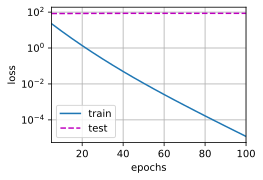

In [7]:
train(lambd=0)

#### 4.5.3.5 使用权重衰减
下面，我们使用权重衰减来运行代码。 注意，在这里训练误差增大，但测试误差减小。 这正是我们期望从正则化中得到的效果

w的L2范数是： 0.3843994438648224


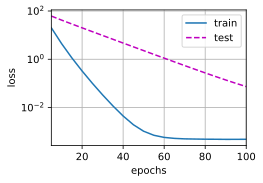

In [8]:
train(lambd=3)

在下面的代码中，
我们在实例化优化器时直接通过weight_decay指定weight decay超参数。
默认情况下，PyTorch同时衰减权重和偏移。 这里我们只为权重设置了weight_decay，所以偏置参数 b 不会衰减。

In [10]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    trainer = torch.optim.SGD([
        {'params': net[0].weight, 'weight_decay': wd},
        {'params': net[0].bias,}
    ], lr = lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log', xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.sum().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch+1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                         d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

w的L2范数： 12.1787748336792


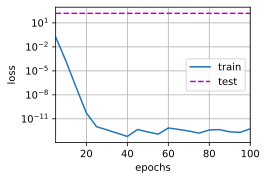

In [11]:
train_concise(0)

w的L2范数： 0.5439942479133606


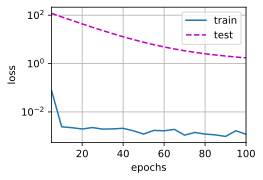

In [12]:
train_concise(3)